# Visualization Notebook for InflationEasy
This notebook demonstrates how to load and visualize the output data generated by the InflationEasy lattice simulation code.
It covers the evolution of the inflaton field, power spectra of curvature perturbations, probability distribution functions (PDFs), and 2D snapshots of the field.

Note: outputs are generated in reduced Planck mass units $M^{\rm reduced}_{\rm Pl}=\frac{M_{\rm Pl}}{\sqrt{8\pi}}=1$, and the scale factor is set to $a=1$ at the beginning of the simulation, which is used to define the comoving momentum.

## 1. Importing Required Libraries
We begin by importing the necessary Python libraries and setting up the plotting style.

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import Normalize

# Set LaTeX rendering and font for consistent plots
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})


## 2. Loading Simulation Data
Reading the output files.

In [74]:
# Define path to results
path = '../results/'

# Load simulation data
s = np.loadtxt(path + 'spectra.dat')
sN = np.loadtxt(path + 'spectraN.dat')
k_list = np.loadtxt(path + 'modes.dat')
st = np.loadtxt(path + 'spectratimes.dat')
f = np.loadtxt(path + 'means.dat')
fv = np.loadtxt(path + 'velocity.dat')
sf = np.loadtxt(path + 'sf.dat')
energy = np.loadtxt(path + 'energy.dat')

# Histogram data (1-point PDFs)
sh = np.loadtxt(path + 'histogram.dat')
sh_zeta = np.loadtxt(path + 'histogramN.dat')
sht = np.loadtxt(path + 'histogramtimes.dat')
sht_zeta = np.loadtxt(path + 'histogramtimesN.dat')


## 3. Inflaton Mean and Velocity
We analyze how the mean inflaton field $\langle\phi\rangle$ and its velocity $\langle\dot\phi\rangle$ evolve during the simulation.

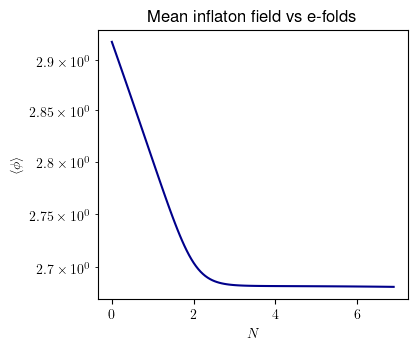

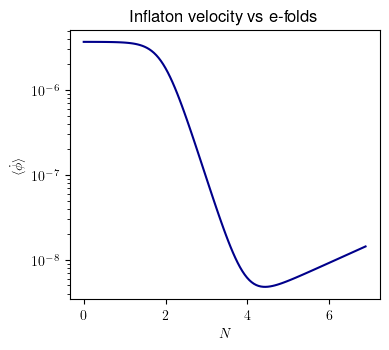

-0.06727650613449938
-3.684886e-06


In [75]:
# Plot the time evolution of the inflaton mean value
plt.figure(figsize=(4, 3.5))
plt.semilogy(np.log(sf[:, 1]), f[:, 2], color='darkblue')
plt.ylabel(r'$\langle\phi\rangle$')
plt.xlabel(r'$N$')
plt.title("Mean inflaton field vs e-folds")
#plt.savefig('../plots/phi.pdf', dpi=300, bbox_inches='tight') 
plt.show()

# Plot the velocity of the inflaton field
plt.figure(figsize=(4, 3.5))
plt.semilogy(np.log(sf[:, 1]), np.abs(fv[:, 2]), color='darkblue')
plt.ylabel(r'$\langle\dot\phi\rangle$')
plt.xlabel(r'$N$')
plt.title("Inflaton velocity vs e-folds")
#plt.savefig('../plots/phidot.pdf', dpi=300, bbox_inches='tight') 
plt.show()

print(fv[0, 2]/np.sqrt(3e-9))
print(fv[0, 2])

## 4. Power Spectrum of Curvature Perturbations
We compare the power spectrum of $\zeta$ using both the linear and the $\delta N$ approach.

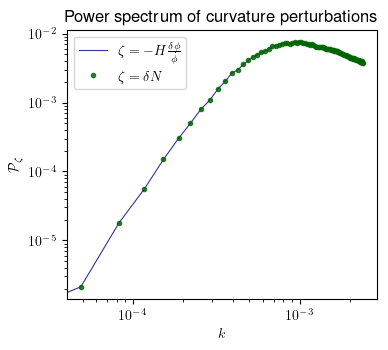

In [76]:
# Extract spectra over time
spectrum_list = [s[i:i+len(k_list), 2] for i in range(0, len(s[:, 0]), len(k_list))]
spectrumN_list = [sN[i:i+len(k_list), 2] for i in range(0, len(sN[:, 0]), len(k_list))]

# Plot final power spectra of zeta
cutoff_i = len(k_list) - 10
lowcutoff_i = 0

plt.figure(figsize=(4, 3.5))
plt.loglog(k_list[lowcutoff_i:cutoff_i], 
           spectrum_list[-1][lowcutoff_i:cutoff_i] * k_list[lowcutoff_i:cutoff_i]**3 / (2 * np.pi**2) * 
           (fv[-1, 2] / sf[-1, 2])**(-2),
           alpha=0.8, lw=0.8, color='darkblue', label=r'$\zeta=-H\frac{\delta\phi}{\dot\phi}$')

plt.loglog(k_list[lowcutoff_i:cutoff_i],
           spectrumN_list[-1][lowcutoff_i:cutoff_i] * k_list[lowcutoff_i:cutoff_i]**3 / (2 * np.pi**2),
           '.', alpha=0.8, lw=2, color='darkgreen', label=r'$\zeta=\delta N$')

plt.ylabel(r'$\mathcal P_{\zeta}$')
plt.xlabel(r'$k$')
plt.legend()
plt.title("Power spectrum of curvature perturbations")
#plt.savefig('../plots/spectrum.pdf', dpi=300, bbox_inches='tight') 
plt.show()


## 5. One-Point PDF of $\zeta$
We examine the distribution of $\zeta$ using histogram-based PDFs.

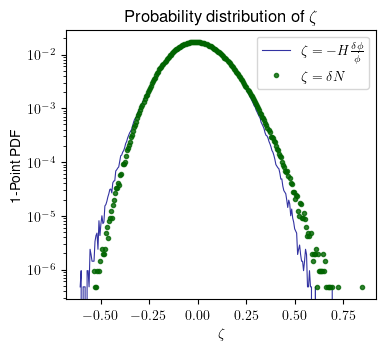

In [77]:
# Number of histogram bins
nbins = 256

# Parse PDFs of zeta and phi
PDF_zeta_n = [sh_zeta[i:i+nbins] for i in range(0, len(sh_zeta), nbins)]
PDF_zeta_x = sht_zeta[2] + sht_zeta[3] * np.linspace(0, nbins, nbins)

PDF_inflaton_n = [sh[i:i+nbins] for i in range(0, len(sh), nbins)]
PDF_inflaton_x = [sht[l,2] + sht[l,3] * np.linspace(0, nbins, nbins)
                  for l in range(len(PDF_inflaton_n))]

# Convert inflaton PDF to linear zeta
mean_inflaton =  np.sum(PDF_inflaton_x[-1]*PDF_inflaton_n[-1])
zeta_linear = (PDF_inflaton_x[-1]-mean_inflaton) * (-sf[-1,2]/fv[-1,2])

# Plot final-time PDFs of zeta (linear and nonlinear)
plt.figure(figsize=(4, 3.5))
plt.semilogy(zeta_linear, PDF_inflaton_n[-1], lw=0.8, alpha=0.8, color='darkblue',
             label=r'$\zeta=-H\frac{\delta\phi}{\dot\phi}$')
plt.semilogy(PDF_zeta_x, PDF_zeta_n[-1], '.', alpha=0.8, lw=1, color='darkgreen', 
             label=r'$\zeta=\delta N$')

plt.xlabel(r'$\zeta$')
plt.ylabel("1-Point PDF")
plt.legend()
plt.title("Probability distribution of $\zeta$")
#plt.savefig('../plots/PDF.pdf', dpi=300, bbox_inches='tight') 
plt.show()


## 6. Energy components
We plot the different components to the energy density, as well as energy conservation

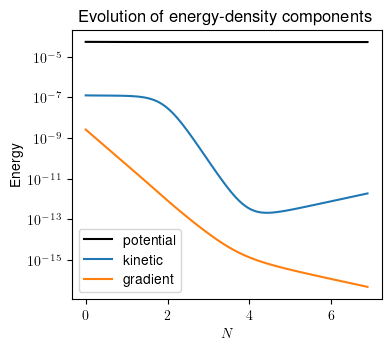

In [78]:
plt.figure(figsize=(4, 3.5))
plt.semilogy(np.log(energy[:, 1]), energy[:, 4],label='potential',color='black')
plt.semilogy(np.log(energy[:, 1]), energy[:, 2],label='kinetic')
plt.semilogy(np.log(energy[:, 1]), energy[:, 3],label='gradient')
plt.legend()
plt.xlabel(r'$N$')
plt.ylabel(r'Energy')
plt.title("Evolution of energy-density components")
#plt.savefig('../plots/energy.pdf', dpi=300, bbox_inches='tight') 
plt.show()


## 7. 2D Real-space Snapshot of $\zeta$
A heatmap showing the final configuration of $\zeta$ in position space on a 2D slice. 

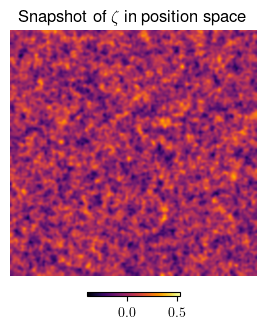

In [79]:
# Load 2D box snapshot of zeta
zeta_flat = np.loadtxt(path + 'snapshots_2d_deltaN.dat')
N = int(np.sqrt(len(zeta_flat)))
zeta_timesteps = zeta_flat.reshape(-1, N, N)

# Final field
zeta_final = zeta_timesteps[-1] 

# Normalize for colormap
valmax = np.max(zeta_final)
valmin = np.min(zeta_final)
norm = Normalize(vmin=valmin, vmax=valmax)

# Create colormap and plot
fig, ax = plt.subplots(figsize=(4, 4))
cmap = matplotlib.colormaps['inferno'].copy()
cmap.set_bad(color='green')

im = ax.imshow(zeta_final, norm=norm, cmap=cmap, interpolation='bicubic')
ax.axis('off')
fig.colorbar(im, ax=ax, shrink=0.3, location='bottom', pad=0.05)
plt.title(r"Snapshot of $\zeta$ in position space")
#plt.savefig('../plots/snapshot.pdf', dpi=300, bbox_inches='tight') 
plt.show()
